In [16]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../models/stylegan2')
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from os.path import join as oj
import pandas as pd
import pickle as pkl
import sklearn.model_selection
import models
import util
import os
import config
import viz
import scipy.stats
from tqdm import tqdm
import figs
import matplotlib.image as mpimg
sys.path.append('transects')
from transects import make_transects, ganwrapper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# look at celeba-hq

0.18353820874593824
0.9860887658247107
0.9999999901068416
0.2058747535026458
0.9857338378454609
0.9999999933220884
0.1800607168384758
0.9860268379592081
0.9999999916888034
0.20848452987583532
0.9816178666296496
0.9999999938085994
0.17168123383343903
0.9827778027784922
0.999999992128373


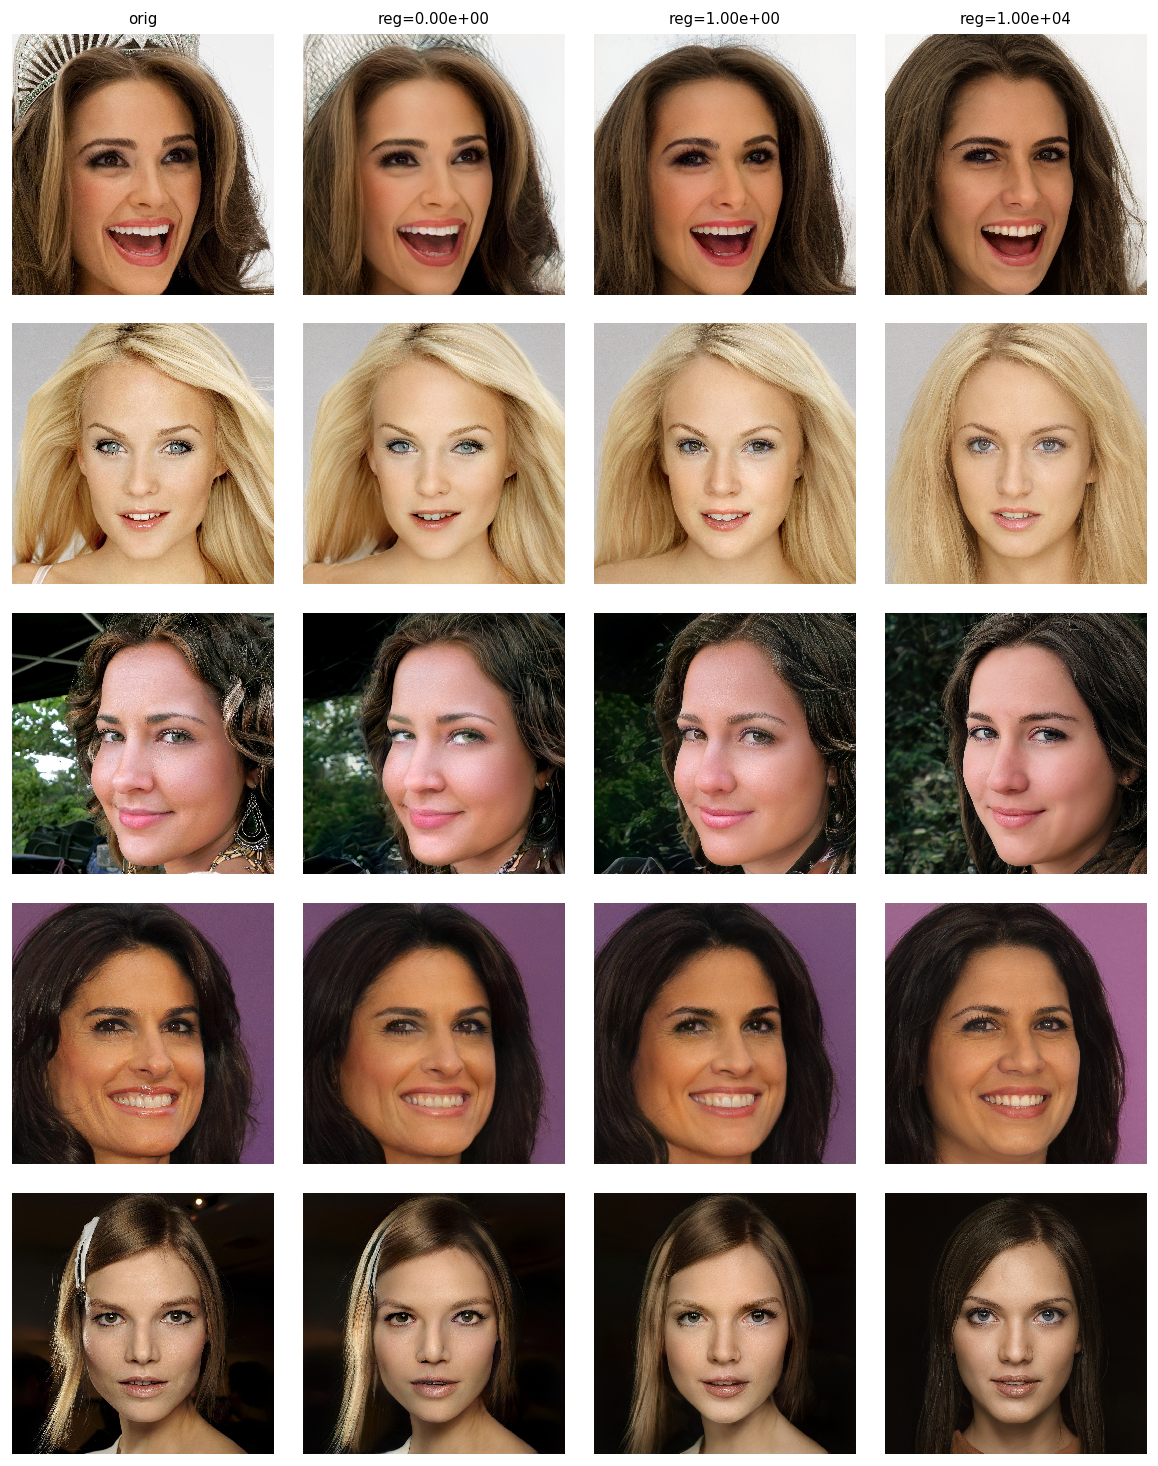

In [11]:
DIR_ORIG = '../data/celeba-hq/ims/'
DIRS_GEN = '../data_processed/celeba-hq/'

regs = [0, 1, 10000]
IM_NUMS = np.arange(1, 6)


R, C = len(IM_NUMS), 1 + len(regs)
plt.figure(dpi=120, figsize=(C*2.5, R*2.5))
for r, IM_NUM in enumerate(IM_NUMS):
    ims = []
    latents = []
    im_orig = mpimg.imread(oj(DIR_ORIG, f'{IM_NUM:05}.jpg'))
    for reg in regs:
        folder = f'generated_images_{reg}'
        im_fname = oj(DIRS_GEN, folder, f'{IM_NUM:05}.png')
        ims.append(mpimg.imread(im_fname))
        latents.append(np.load(oj(DIRS_GEN, folder, f'{IM_NUM:05}.npy')))
        print(np.mean(np.abs(np.corrcoef(latents[-1]))))

    
    plt.subplot(R, C, C * r + 1)
    util.imshow(im_orig)
    if r == 0:
        plt.title('orig', fontsize=9)

    for i in range(len(regs)):
        plt.subplot(R, C, C * r + 2 + i)
        util.imshow(ims[i])
        if r == 0:
            plt.title(f'reg={regs[i]:.2e}', fontsize=9)
plt.tight_layout()

In [12]:
latents_mean = np.array(latents).mean(axis=1)

In [13]:
G = ganwrapper.GANWrapper(image_size=512)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [17]:
make_transects.make_transects(
                   G,
                   save_dir='results/t1',
                   model_dir="transects/data/latent-models/",
                   latents=latents_mean)

AttributeError: 'tuple' object has no attribute 'shape'